In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target
X.shape

(506, 13)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape

(404, 13)

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

models = {'Decision Tree': DecisionTreeRegressor(random_state=0), 
          'Random Forest': RandomForestRegressor(random_state=0), 
          'AdaBoost': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), 
                                        random_state=0), 
          'GradientBoost': GradientBoostingRegressor(random_state=0)}

In [6]:
# 利用公式計算調整後 R^2
def adj_R2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

In [7]:
import pandas as pd

scores = {}
for name, reg in models.items():
    reg.fit(X_train, y_train)
    
    r2 = reg.score(X_train, y_train)
    scores[(name, 'Train score')] = adj_R2(r2, X_train.shape[0], X_train.shape[1])
    r2 = reg.score(X_test, y_test)
    scores[(name, 'Test score')] = adj_R2(r2, X_test.shape[0], X_test.shape[1])

pd.Series(scores).unstack()

,Test score,Train score
AdaBoost,0.669731,0.999570
Decision Tree,0.479386,1.000000
GradientBoost,0.749469,0.981384
Random Forest,0.737762,0.982265


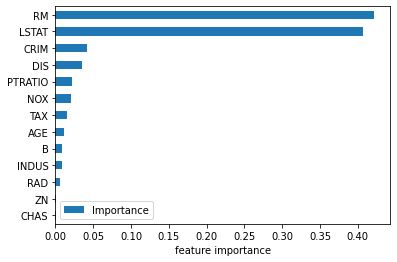

In [10]:
import matplotlib.pyplot as plt

fea_imp = pd.DataFrame(models['Random Forest'].feature_importances_, 
                       index=boston.feature_names, 
                       columns=['Importance'])
fea_imp.sort_values(by='Importance', ascending=True, inplace=True)
fea_imp.plot(kind='barh')
plt.xlabel('feature importance');

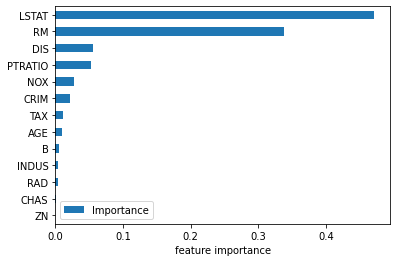

In [11]:
fea_imp = pd.DataFrame(models['GradientBoost'].feature_importances_, 
                       index=boston.feature_names, 
                       columns=['Importance'])
fea_imp.sort_values(by='Importance', ascending=True, inplace=True)
fea_imp.plot(kind='barh')
plt.xlabel('feature importance');